## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

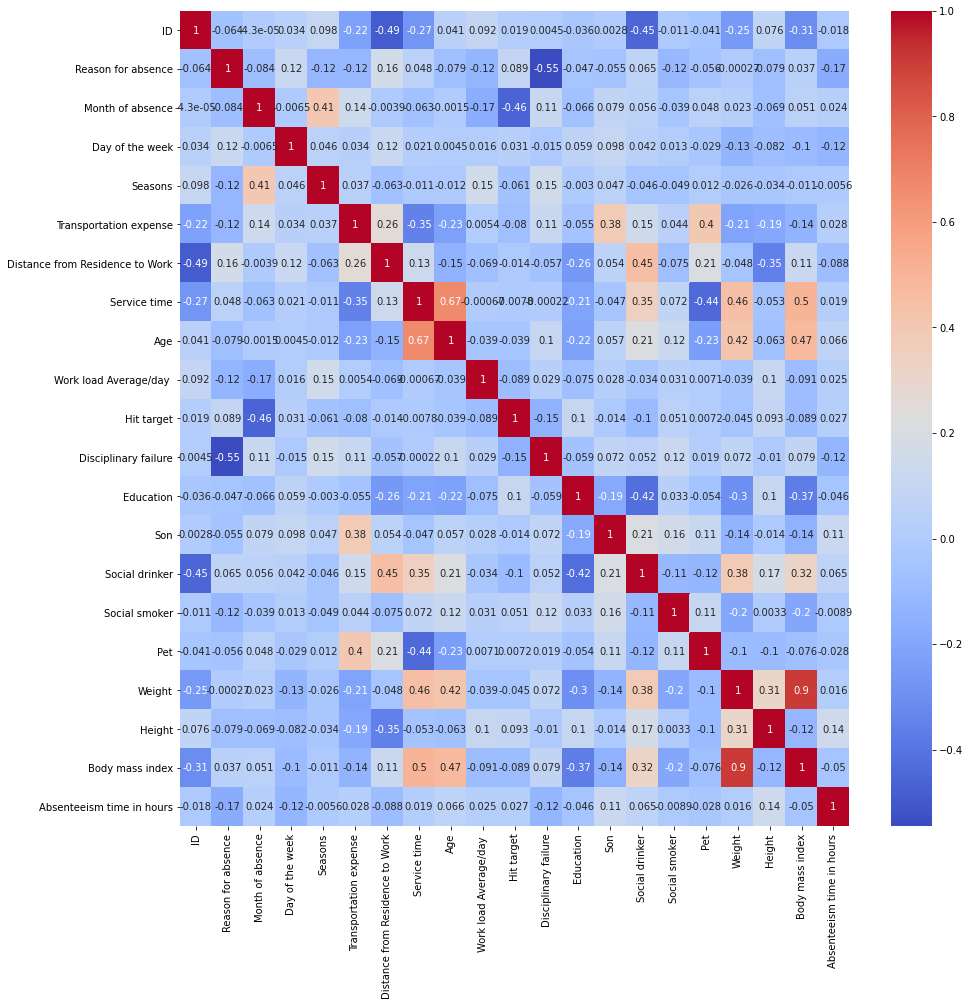

In [5]:
#answer below:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(absent.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [6]:
absent_d = absent.drop(columns=['Month of absence','Age','ID','Body mass index','Reason for absence'])

In [7]:
new_df = pd.get_dummies(data=absent_d, columns=['Education','Day of the week', 'Seasons'], drop_first=True)

Scale the independent variables using the standard scaler

In [9]:
# answer below:

from sklearn.model_selection import train_test_split

X = new_df.drop('Absenteeism time in hours', axis=1)
y = new_df['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [11]:
# answer below:

from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

svr.fit(X_train_scaled, y_train)

print("Train score: ",svr.score(X_train_scaled, y_train))
print("Test score: ",svr.score(X_test_scaled, y_test))

Train score:  -0.017392735822219896
Test score:  -0.014263104010618033


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [13]:
# answer below:

from sklearn.model_selection import GridSearchCV
from datetime import datetime

start_time = datetime.now()
param_grid = {'kernel': ['linear', 'poly', 'rbf'],'gamma': ['scale','auto'], 
              'C':[10,20,30,40],'epsilon': [2.5,3,3.5,4,4.5]}

svr = SVR()

svr_grid = GridSearchCV(svr, param_grid=param_grid, scoring='r2', cv=5)

svr_grid.fit(X_train_scaled, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:19.036890


In [14]:
print("Best kernel hyperpararmeter using R2 scoring: ",svr_grid.best_estimator_.kernel)
print("Best gamma hyperpararmeter using R2 scoring: ",svr_grid.best_estimator_.gamma)
print("Best C hyperpararmeter using R2 scoring: ",svr_grid.best_estimator_.C)
print("Best epsilon hyperpararmeter using R2 scoring: ",svr_grid.best_estimator_.epsilon)

Best kernel hyperpararmeter using R2 scoring:  rbf
Best gamma hyperpararmeter using R2 scoring:  scale
Best C hyperpararmeter using R2 scoring:  20
Best epsilon hyperpararmeter using R2 scoring:  4


In [15]:

best_svr = SVR(kernel='rbf',gamma='scale',C=20,epsilon=3.5)

best_svr.fit(X_train, y_train)

print("SVR Best Fit R2 scoring Train score: ",best_svr.score(X_train_scaled, y_train))
print("SVR Best Fit R2 scoring Test score: ",best_svr.score(X_test_scaled, y_test))

SVR Best Fit R2 scoring Train score:  -0.046834623424446775
SVR Best Fit R2 scoring Test score:  -0.04530829636672751


In [16]:
# answer using MSE scoring:
from sklearn.model_selection import GridSearchCV
from datetime import datetime

start_time = datetime.now()
param_grid = {'kernel': ['linear', 'poly', 'rbf'],'gamma': ['scale','auto'], 
              'C':np.arange(1, 20, 2),'epsilon': np.arange(3, 7, .5)}

svr = SVR()

svr_grid = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

svr_grid.fit(X_train_scaled, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:47.486168


In [17]:

print("Best kernel hyperpararmeter using MSE scoring: ",svr_grid.best_estimator_.kernel)
print("Best gamma hyperpararmeter using MSE scoring: ",svr_grid.best_estimator_.gamma)
print("Best C hyperpararmeter using MSE scoring: ",svr_grid.best_estimator_.C)
print("Best epsilon hyperpararmeter using MSE scoring: ",svr_grid.best_estimator_.epsilon)

Best kernel hyperpararmeter using MSE scoring:  rbf
Best gamma hyperpararmeter using MSE scoring:  scale
Best C hyperpararmeter using MSE scoring:  19
Best epsilon hyperpararmeter using MSE scoring:  5.0


In [18]:
best_svr = SVR(kernel='rbf',gamma='scale',C=15,epsilon=4)

best_svr.fit(X_train, y_train)

print("SVR Best Fit MSE scoring Train score: ",best_svr.score(X_train_scaled, y_train))
print("SVR Best Fit MSE scoring Test score: ",best_svr.score(X_test_scaled, y_test))

SVR Best Fit MSE scoring Train score:  -0.11894181685636653
SVR Best Fit MSE scoring Test score:  -0.10401297313634439


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


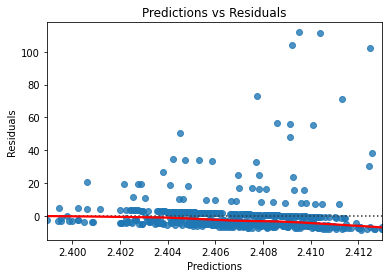

In [19]:
# answer below:

# answer below:
pred = best_svr.predict(X_train_scaled)
res = y_train - pred

sns.residplot(pred, res, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions vs Residuals')
plt.show()

In [ ]:
#SVR model predictor of errors better than KNN